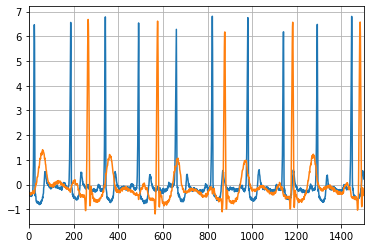

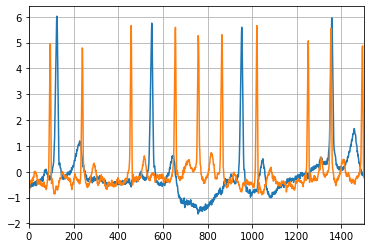

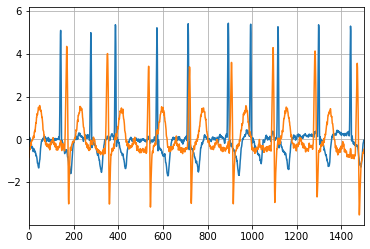

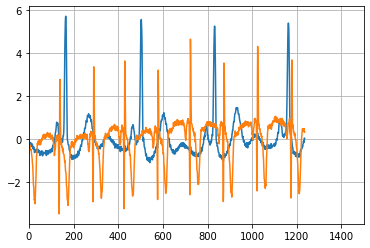

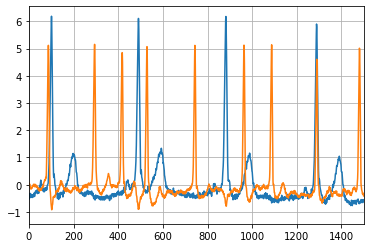

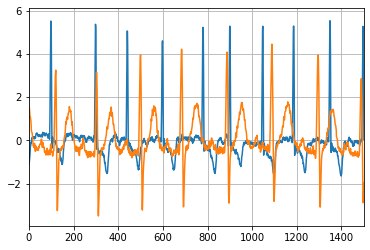

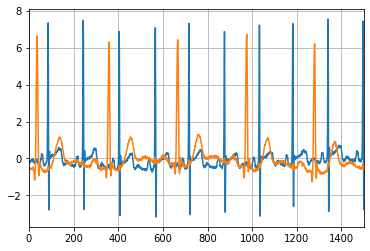

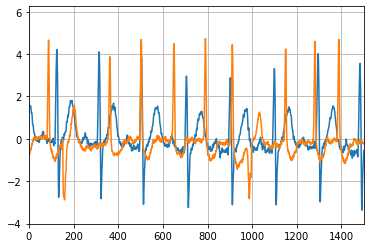

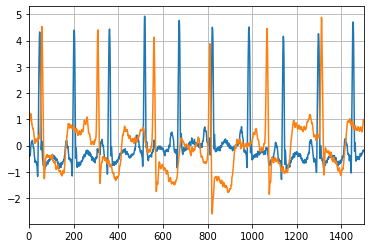

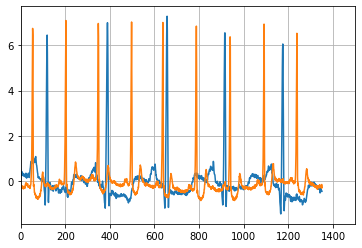

In [1]:
import scipy.io
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import FastICA

def load_data(file):
    mat = scipy.io.loadmat(file)
    return mat['val'][0]

def show_subplot(ax, y, start, stop):
    x_linspace = np.linspace(0, len(y), len(y))
    ax.set_xlim([start, stop])
    ax.plot(x_linspace, y)

def apply_filter(y_transformed, strength):
    filtered_y = np.array([])
    for row in y_transformed.T:
        
        filtered_row = savgol_filter(row, strength, 1)
        filtered_row = filtered_row.T
        filtered_y = np.append(filtered_y, filtered_row)
        filtered_y = np.reshape(filtered_y, (-1, 1500))
    return filtered_y.T

directory = 'heartbeat_data'
stop=10  #set the number of files you want to go through


def filter_noise(directory, stop):
    for i, filename in enumerate(os.listdir(directory)):
        if i == stop:
            break
        fig_subset_view, ax = plt.subplots()
        ax.grid()
        
        mat = scipy.io.loadmat('heartbeat_data/'+filename)
        y=mat['val'][0]
        y_transposed = y.T # columns
        transformer = FastICA(whiten='unit-variance')
        y_transformed = transformer.fit_transform(y_transposed)
        y_beats = []

        for row in y_transformed.T:
            if min(row)< -2 or max(row)>2:
                # flip sign
                if abs(np.min(row)) > abs(np.max(row)):
                    row = row * -1
                y_beats.append(row)

        y_beats = np.asarray(y_beats)


        show_subplot(ax, y_beats.T, 0, 1500)

filter_noise(directory, stop)

# update